In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #graphing
import plotly.express as px #graphing
import seaborn as sns #graphing

sns.set(rc = {"figure.figsize":(10, 6)}) #graph size

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/snowcrab/mfsnowcrab.csv


In [2]:
df = pd.read_csv("/kaggle/input/snowcrab/mfsnowcrab.csv")

# Columns in dataset 🦀
- `latitude`: The latitude (decimal degrees) at the start of the haul.
- `longitude`: The longitude (decimal degrees) at the start of the haul.
- `year`: Year specimen was collected.
- `name`: The common name of the marine organism associated with the scientific name.
- `sex`: Gender of crab.
- `bottom_depth`: Meters (m). Weighted average depth (m) and is calculated by adding gear depth to net height.
- `surface_temperature`: Surface temperature, in tenths of a degree, Celsius.
- `bottom_temperature`: Average temperature (in tenths of a degree Celsius) measured at the maximum depth of the trawl.
- `haul`: This number uniquely identifies a haul within a cruise. It is a sequential number, in chronological order of occurrence.
- `cpue`: Catch per unit effort. Catch number per area the net swept in number/square nautical mile.

In [3]:
df.head()

,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,cpue
0,147038,57.00000,-166.45000,1975,snow crab,male,71,9.1,1.1,117,40356
1,147037,57.00000,-167.08333,1975,snow crab,male,71,8.7,1.4,118,68691
2,147036,57.00000,-167.68333,1975,snow crab,male,75,8.8,1.6,139,119748
3,147035,56.66667,-172.56667,1975,snow crab,male,132,6.1,2.5,89,7882
4,147034,56.66667,-171.96667,1975,snow crab,male,123,5.7,2.1,90,11258


In [4]:
df.shape

(17927, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17927 entries, 0 to 17926
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   17927 non-null  int64  
 1   latitude             17927 non-null  float64
 2   longitude            17927 non-null  float64
 3   year                 17927 non-null  int64  
 4   name                 17927 non-null  object 
 5   sex                  17927 non-null  object 
 6   bottom_depth         17927 non-null  int64  
 7   surface_temperature  17927 non-null  float64
 8   bottom_temperature   17927 non-null  float64
 9   haul                 17927 non-null  int64  
 10  cpue                 17927 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.5+ MB


In [6]:
df.describe().style.background_gradient(cmap = "Blues")

,id,latitude,longitude,year,bottom_depth,surface_temperature,bottom_temperature,haul,cpue
count,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000,17927.000000
mean,162675.094048,58.529967,-170.670173,1997.763653,90.006192,7.124287,1.802226,123.805991,32875.689240
std,7390.543287,1.674403,3.871000,12.039272,28.336891,1.979158,1.737456,51.736292,115427.675474
min,145878.000000,54.666670,-178.223090,1975.000000,22.000000,-1.100000,-2.100000,1.000000,52.000000
25%,158285.500000,57.166220,-173.589910,1988.000000,68.000000,5.900000,0.600000,86.000000,483.000000
50%,163807.000000,58.344670,-170.850250,1998.000000,84.000000,7.300000,2.000000,127.000000,3215.000000
75%,168610.500000,59.992260,-167.850550,2008.000000,110.000000,8.600000,3.200000,164.000000,21008.500000
max,173422.000000,62.044500,-158.397950,2018.000000,276.000000,14.100000,10.000000,334.000000,5117962.000000


# Eastern Bering Sea ❄️ Snow Crab Distribution Map 🦀
***

📌 - **Isolate male or female for gender specific trends.**

In [7]:
figmap = px.scatter_geo(df, lat = "latitude", lon = "longitude",
                     color = "sex", size = "cpue", opacity = 0.5,
                     hover_name = "name",
                     hover_data = ["bottom_depth", "surface_temperature", "bottom_temperature"],
                     animation_frame = "year",
                     color_discrete_map = {"male":"#0000DC", "female":"#DC0000"},
                     width = 950, height = 650, projection = "aitoff")

figmap.update_geos(
    resolution = 50, fitbounds = "locations", framecolor = "#FFFFFF",
    showcoastlines = True, coastlinecolor = "#FFFFFF",
    showland = True, landcolor = "#005000",
    showocean = True, oceancolor = "#000000",
    showlakes = True, lakecolor = "#005AA8",
    showrivers = True, rivercolor = "#005AA8",
    showsubunits = True, subunitcolor = "#000000",
)

#figmap.update_traces(marker = dict(line = dict(width = 1.2, color = "#FFFFFF")))
figmap.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
figmap.show()

# Bottom Depth and Location - Male and Female Snow Crab 🦀 ♂ ♀

In [8]:
fig = px.scatter_3d(df, x = "longitude", y = "latitude", z = "bottom_depth",
                    range_x = (-160, -180), range_y = (55, 63), range_z = (200, 0),
                    color = "sex", color_discrete_map = {"male":"#0000DC", "female":"#DC0000"},
                    animation_frame = "year", opacity = 0.5)
                    #title = "Bottom Depth and Location of Male and Female Snow Crab")

fig.update_traces(marker = dict(size = 3)) # scaling down the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

# Total Snow Crab Density 🦀

In [9]:
fig = px.density_contour(df, x = "longitude", y = "latitude", title = "Total Snow Crab Density")

fig.update_traces(contours_coloring = "fill", contours_showlabels = True)
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 16))
fig.show()

# Male Snow Crab Density 🦀 ♂

Text(0.5, 1.0, 'Male Snow Crab Density')

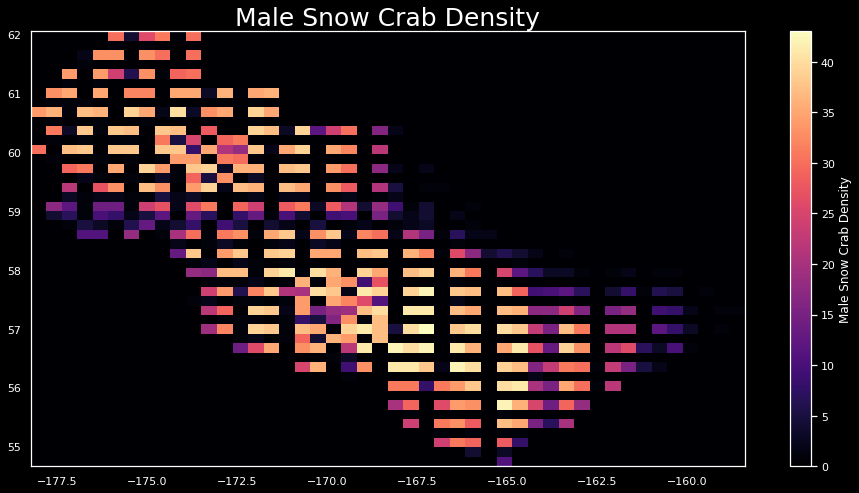

In [10]:
df0 = df[df["sex"] == "male"]

plt.style.use("dark_background")
plt.figure(figsize = (16, 8))

plt.hist2d(data = df0, x = "longitude", y = "latitude", bins = 46, cmap = "magma")

plt.colorbar(label = "Male Snow Crab Density", orientation = "vertical")
#plt.clim(0, 80) # Limits range of color bar
plt.title("Male Snow Crab Density", fontsize = 25)

# Female Snow Crab Density 🦀 ♂

Text(0.5, 1.0, 'Female Snow Crab Density')

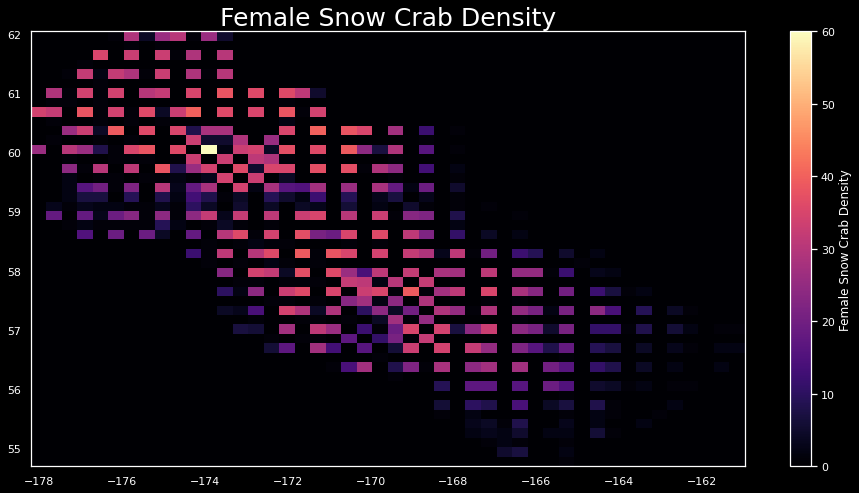

In [11]:
df0 = df[df["sex"] == "female"]

plt.style.use("dark_background")
plt.figure(figsize = (16, 8))

plt.hist2d(data = df0, x = "longitude", y = "latitude", bins = 46, cmap = "magma")

plt.colorbar(label = "Female Snow Crab Density", orientation = "vertical")
#plt.clim(0, 80) # Limits range of color bar
plt.title("Female Snow Crab Density", fontsize = 25)

# Ocean Depth (Bottom Depth) 🦀

In [12]:
fig = px.bar(df, x = "bottom_depth", range_x = [30, 175], y = "cpue", color = "sex", 
             color_discrete_map = {"male":"#0000DC", "female":"#DC0000"}, 
             title = "Snow Crab Catch Per Unit Effort by Ocean Depth (Meters)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [13]:
fig = px.density_heatmap(df, x = "year", y = "bottom_depth", nbinsx = 86, nbinsy = 43,
                         color_continuous_scale = "Portland", 
                         title = "Snow Crab Density by Ocean Depth (Meters)")

fig["layout"]["yaxis"]["autorange"] = "reversed"
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_layout(yaxis_range = [0, 200])

fig.show()

In [14]:
df0 = df[df["sex"] == "male"]

fig = px.box(df0, x = "year", y = "bottom_depth", 
             title = "Male Snow Crab Density by Ocean Depth (Meters) 🦀 ♂")

fig.update_traces(marker = dict(size = 6, color = "#0000DC", line = dict(width = 1, color = "#FFFFFF")))
fig["layout"]["yaxis"]["autorange"] = "reversed"
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_layout(yaxis_range = [0, 200])

fig.show()

In [15]:
df0 = df[df["sex"] == "female"]

fig = px.box(df0, x = "year", y = "bottom_depth", 
             title = "Female Snow Crab Density by Ocean Depth (Meters) 🦀 ♀")

fig.update_traces(marker = dict(size = 6, color = "#DC0000", line = dict(width = 1, color = "#FFFFFF")))
fig["layout"]["yaxis"]["autorange"] = "reversed"
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.update_layout(yaxis_range = [0, 200])

fig.show()

Text(0.5, 1.0, 'Snow Crab Density by Ocean Depth (Meters)')

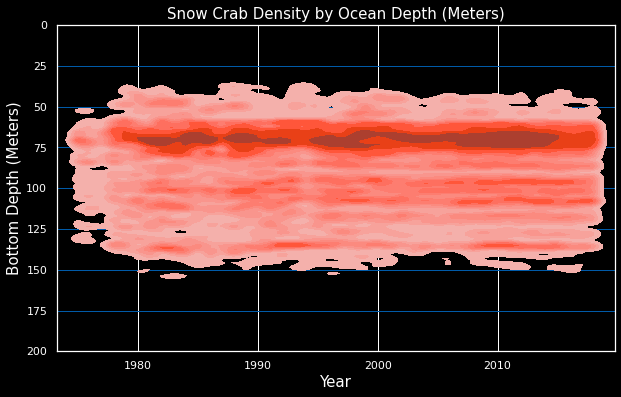

In [16]:
sns.kdeplot(data = df, x = "year", y = "bottom_depth", color = "#FF4100", fill = True, bw_adjust = .25)

plt.ylim(0, 200)
plt.ylim(reversed(plt.ylim()))
plt.grid(axis = "y", color = "#005AA8")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Bottom Depth (Meters)", fontsize = 15)
plt.title("Snow Crab Density by Ocean Depth (Meters)", fontsize = 15)

# Ocean Surface Temperature (Celsius) 🦀

In [17]:
fig = px.bar(df, x = "surface_temperature", y = "cpue", color = "sex", 
             color_discrete_map = {"male":"#0000DC", "female":"#DC0000"}, 
             title = "Snow Crab Catch Per Unit Effort by Ocean Surface Temperature (Celsius)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [18]:
fig = px.density_heatmap(df, x = "year", y = "surface_temperature", nbinsx = 86, nbinsy = 43,
                         color_continuous_scale = "Portland", 
                         title = "Snow Crab Density by Ocean Surface Temperature (Celsius)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [19]:
df0 = df[df["sex"] == "male"]

fig = px.box(df0, x = "year", y = "surface_temperature", 
             title = "Male Snow Crab Density by Surface Temperature (Celsius) 🦀 ♂")

fig.update_traces(marker = dict(size = 6, color = "#0000DC", line = dict(width = 1, color = "#FFFFFF")))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [20]:
df0 = df[df["sex"] == "female"]

fig = px.box(df0, x = "year", y = "surface_temperature", 
             title = "Female Snow Crab Density by Surface Temperature (Celsius) 🦀 ♀")

fig.update_traces(marker = dict(size = 6, color = "#DC0000", line = dict(width = 1, color = "#FFFFFF")))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

Text(0.5, 1.0, 'Snow Crab Density by Ocean Surface Temperature (Celsius)')

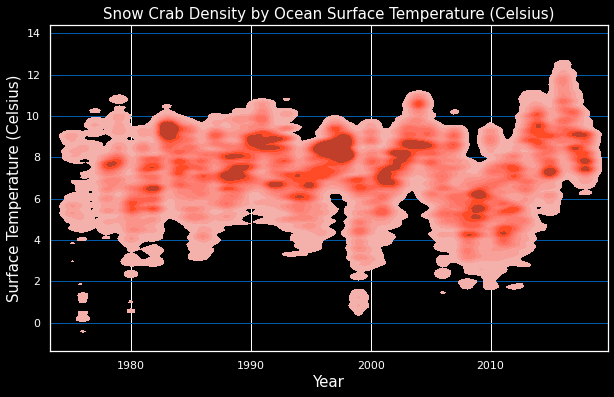

In [21]:
sns.kdeplot(data = df, x = "year", y = "surface_temperature", color = "#FF4100", fill = True, bw_adjust = .25)

plt.grid(axis = "y", color = "#005AA8")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Surface Temperature (Celsius)", fontsize = 15)
plt.title("Snow Crab Density by Ocean Surface Temperature (Celsius)", fontsize = 15)

# Bottom Temperature (Celsius) 🦀

In [22]:
fig = px.bar(df, x = "bottom_temperature", range_x = [-2.5, 6.5], y = "cpue", color = "sex", 
             color_discrete_map = {"male":"#0000DC", "female":"#DC0000"}, 
             title = "Snow Crab Catch Per Unit Effort by Bottom Temperature (Celsius)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [23]:
fig = px.density_heatmap(df, x = "year", y = "bottom_temperature", nbinsx = 86, nbinsy = 43,
                         color_continuous_scale = "Portland", 
                         title = "Snow Crab Density by Bottom Temperature (Celsius)")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [24]:
df0 = df[df["sex"] == "male"]

fig = px.box(df0, x = "year", y = "bottom_temperature", 
             title = "Male Snow Crab Density by Bottom Temperature (Celsius) 🦀 ♂")

fig.update_traces(marker = dict(size = 6, color = "#0000DC", line = dict(width = 1, color = "#FFFFFF")))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

In [25]:
df0 = df[df["sex"] == "female"]

fig = px.box(df0, x = "year", y = "bottom_temperature", 
             title = "Female Snow Crab Density by Bottom Temperature (Celsius) 🦀 ♀")

fig.update_traces(marker = dict(size = 6, color = "#DC0000", line = dict(width = 1, color = "#FFFFFF")))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

Text(0.5, 1.0, 'Snow Crab Density by Bottom Temperature (Celsius)')

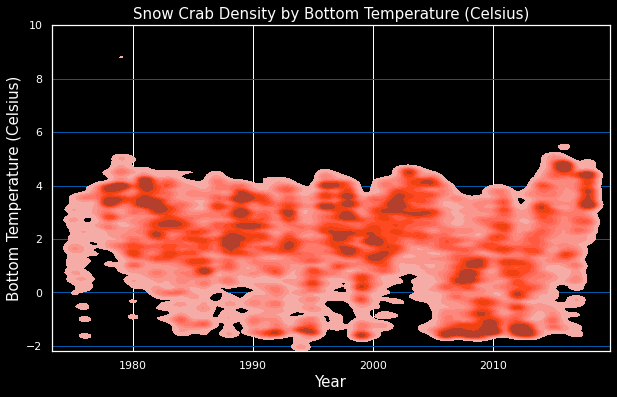

In [26]:
sns.kdeplot(data = df, x = "year", y = "bottom_temperature", color = "#FF4100", fill = True, bw_adjust = .25)

plt.ylim(-2.2, 10)
plt.grid(axis = "y", color = "#005AA8")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Bottom Temperature (Celsius)", fontsize = 15)
plt.title("Snow Crab Density by Bottom Temperature (Celsius)", fontsize = 15)

# Catch Per Unit Effort by Year 🦀

In [27]:
fig = px.bar(df, x = "year", y = "cpue", color = "sex", 
             color_discrete_map = {"male":"#0000DC", "female":"#DC0000"}, 
             title = "Snow Crab Catch Per Unit Effort by Year")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.show()

**Thank you for viewing this notebook. Please feel free to provide any feedback on this notebook or the dataset associated with it!**